In [44]:
import pandas as pd
import numpy as np
import string
import random
import matplotlib.pyplot as plt

In [45]:
#Creating a list of user_id
def create_user_id(num):
    user_id = [''.join(random.choices(string.digits, k=10)) for i in range(num)]
    return user_id


#Generating Random date and time
def random_date_and_time(start, end, n):
    return pd.to_datetime(np.random.randint(start.value//(1e9),end.value//(1e9),n), unit='s')


#Matching the user_id and date 
def exact_user_id(user, n):
    user_id2 = []
    m = len(user)
    for i in range(n):
        temp = (np.random.randint(0,9999999))%m
        user_id2.append(user[temp])
    return user_id2


In [46]:
print("Number of users:")
n = int(input())
print('Preferred size of dataset:')
m = int(input())

Number of users:
10
Preferred size of dataset:
10


In [47]:
# start and end date time
start = pd.to_datetime('2021-01-01')
end = pd.to_datetime('2021-02-01')

In [48]:
#Generating all the array
userId = create_user_id(n)
date = random_date_and_time(start,end,m)
date = date.sort_values()
user_id = exact_user_id(userId,m)

In [49]:
df = pd.DataFrame({'user_id': user_id, 'login_date_time': date, 'event_name':'app_open'})

In [50]:
df.head()

,user_id,login_date_time,event_name
0,1427513775,2021-01-01 06:27:57,app_open
1,3067534190,2021-01-03 21:18:24,app_open
2,9627176285,2021-01-12 17:10:36,app_open
3,8750211278,2021-01-15 09:33:46,app_open
4,1427513775,2021-01-26 12:32:53,app_open


In [51]:
df.shape

(10, 3)

In [52]:
df.to_csv("output_task_1.csv", index=False)

In [53]:
#Storing the frequency of users that are active in a particular time period of 0-1, 1-2, ...
login_freq = [ 0 for i in range(24)]

#Age data to store the first and last login
user_age_data = {}

#Login Count store for any User 
login_count_data = {}

for i in range(df.shape[0]):
    if df.iloc[i][0] in user_age_data:
        if(user_age_data[df.iloc[i][0]][1].day != df.iloc[i][1].day):
            login_count_data[df.iloc[i][0]] += 1
        user_age_data[df.iloc[i][0]][1] = df.iloc[i][1]
    else:
        temp = [df.iloc[i][1],df.iloc[i][1]]
        user_age_data[df.iloc[i][0]]=temp
        login_count_data[df.iloc[i][0]] = 1

    hr = df.iloc[i][1].hour
    mn = df.iloc[i][1].minute
    if(mn==0 and hr>0):
        login_freq[hr-1] += 1
    else:
        login_freq[hr] += 1

In [54]:
#Saving the Login count for the users
users_login = df['user_id'].unique()
count_login = [ login_count_data[i] for i in users_login]
df_count = pd.DataFrame({'user_id':users_login, 'login_count': count_login})
df_count.to_csv("login_count.csv",index=False)

In [55]:
#The frequency of day wise
age_data = [ 0 for _ in range(7)]

for key, value in user_age_data.items():
    val = (value[1] - value[0]).days + 1
    print(val)
    if val>=11 and val<=20:
        age_data[6] += 1
    elif val<11 and val>=6:
        age_data[5] += 1
    elif val<6:
        age_data[val-1] += 1

30
1
16
1
1
1


In [56]:
#Percentage generation for the dataframe
age_data_percent = [round((age_data[i]*100)/len(user_age_data),2) for i in range(7)]

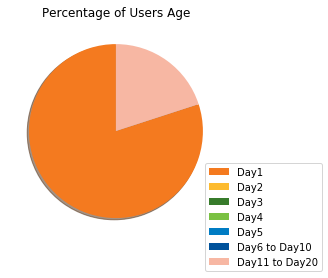

In [57]:
#Pie chart on distribution of User Age
age_data_col_name = ['Day1','Day2','Day3','Day4','Day5','Day6 to Day10','Day11 to Day20']
color_col = ['#F47A1F','#FDBB2F','#377B2B','#7AC142','#007CC3','#00529B','#F7B7A3']
plt.pie(age_data,colors=color_col,startangle=90,shadow=True)
plt.legend(labels=age_data_col_name,bbox_to_anchor=(1,0), loc="lower right",bbox_transform=plt.gcf().transFigure)
plt.title("Percentage of Users Age")
plt.show()

In [58]:
df_age = pd.DataFrame({'% users':age_data_percent, 'Age': age_data_col_name})
df_age['% users'] = df_age['% users'].astype(str) + '%'

In [59]:
df_age

,% users,Age
0,66.67%,Day1
1,0.0%,Day2
2,0.0%,Day3
3,0.0%,Day4
4,0.0%,Day5
5,0.0%,Day6 to Day10
6,16.67%,Day11 to Day20


In [60]:
#Saving the age percentage to a csv
df_age.to_csv("user_age.csv", index=False)

In [61]:
#Login frequency of all the users to get the detail at which time users are most active 
login_freq_dict = { str(i)+"-"+str(i+1):login_freq[i] for i in range(23)}
login_freq_dict['23-0'] = login_freq[23]
login_freq_dict

{'0-1': 0,
 '1-2': 0,
 '2-3': 0,
 '3-4': 0,
 '4-5': 0,
 '5-6': 0,
 '6-7': 1,
 '7-8': 0,
 '8-9': 0,
 '9-10': 2,
 '10-11': 0,
 '11-12': 0,
 '12-13': 1,
 '13-14': 0,
 '14-15': 0,
 '15-16': 0,
 '16-17': 1,
 '17-18': 2,
 '18-19': 0,
 '19-20': 0,
 '20-21': 0,
 '21-22': 1,
 '22-23': 2,
 '23-0': 0}

In [62]:
#Getting the top 5 time interval in which users are most active
login_top = {k: v for k, v in sorted(login_freq_dict.items(), key=lambda item: item[1], reverse=True)}
login_top_5 = {k: login_top[k] for k in list(login_top)[:5]}
login_top_5_colour = []
for k in login_freq_dict.keys():
    if k in login_top_5.keys():
        login_top_5_colour.append('r')
    else:
        login_top_5_colour.append('grey')        

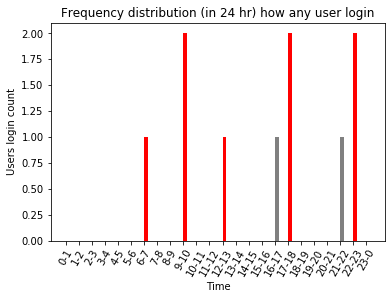

In [63]:
#Red shows the top 5 users engagement time.
plt.bar(login_freq_dict.keys(),login_freq_dict.values(), align='edge', width=0.3, color=login_top_5_colour)
plt.title("Frequency distribution (in 24 hr) how any user login")
plt.ylabel("Users login count")
plt.xlabel("Time")
plt.xticks(rotation=60)
plt.show()